In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

from modules.read_spreadsheet import read_file_xlsx
from modules.get_general_informations import get_informations
from modules.plots import save_fig

#Defautl configurations for the plots
plt.close('all')
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = ['cmr10']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Input and output paths    
path_load = os.getcwd() + '/data/loads/'
path_xlsx = os.getcwd() + '/data/spreadsheets/'
path_dss = os.getcwd() + '/data/dss_files/'	
output_csv = os.getcwd() + '/data/output/csv/'
output_img = os.getcwd() + '/data/output/img/'
path_generators = os.getcwd() + '/data/generators_profiles/'


In [8]:
# Read the data
kind = 'Simple'
# dss = '5Nodeckt'
dss = 'CondominioDosIpes'
bess_bus = 'bus_001'
if  not kind == 'NoOperation':
    load = pd.read_csv(output_csv + 'load/' f'load_{kind}_{bess_bus}_year{dss}.csv')
    generation = pd.read_csv(output_csv + 'generation/' f'generation_{kind}_{bess_bus}_year{dss}.csv')
    demand = pd.read_csv(output_csv + 'demand/' f'demand_{kind}_{bess_bus}_year{dss}.csv')
    bess_df = pd.read_csv(output_csv + 'bess/' f'bess_powers_{kind}_{bess_bus}_year{dss}.csv')
else:
    load = pd.read_csv(output_csv + 'load/' f'load_{kind}_year{dss}.csv')
    generation = pd.read_csv(output_csv + 'generation/' f'generation_{kind}_year{dss}.csv')
    demand = pd.read_csv(output_csv + 'demand/' f'demand_{kind}_year{dss}.csv')

# Read the file and
name_spreadsheet = 'sheet_IEEE13Node.xlsx' # Name of your spreadsheet with parameters of the system in directory data/spreadsheets
file_contents = read_file_xlsx(path_xlsx+name_spreadsheet)
general_informations = file_contents['General']
general_informations = get_informations(general_informations)
date_ini = general_informations.start_date
date_end = general_informations.end_date
interval = general_informations.timestep
time = pd.date_range(date_ini, date_end, freq=str(interval) + 'T')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_105964\3783004202.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time = pd.date_range(date_ini, date_end, freq=str(interval) + 'T')


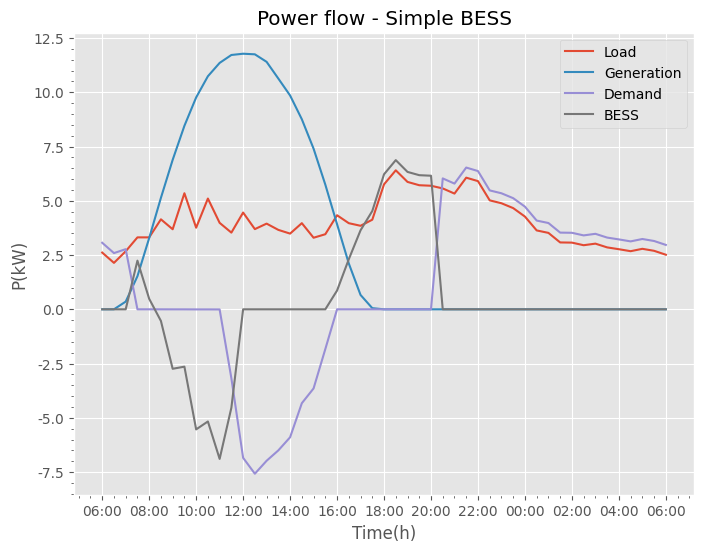

In [9]:

if not kind == 'NoOperation':
    #Extract the timestep from power_df
    load = load['P(kW)'][:len(time)]
    generation = generation['P(kW)'][:len(time)]
    demand_bess = demand['P(kW)'][:len(time)]
    bess_power = bess_df.loc[:, 'P(kW)'][:len(time)]

    #Plot the data
    fig = plt.figure(figsize=(8,6))
    plt.title(f'Power flow - {kind} BESS')
    plt.plot(time, load, label='Load')
    plt.plot(time, generation, label='Generation')
    plt.plot(time, demand_bess, label='Demand')
    plt.plot(time, bess_power, label='BESS')
    plt.legend()
    plt.xlabel('Time(h)')
    plt.ylabel('P(kW)')
    plt.grid(True)

    # Format the x axis to display readable times
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
    plt.minorticks_on()

else:
    #Extract the timestep from power_df
    load = load['P(kW)'][:len(time)]
    generation = generation['P(kW)'][:len(time)]
    demand_bess = demand['P(kW)'][:len(time)]

    #Plot the data
    fig = plt.figure(figsize=(8,6))
    plt.title(f'Power flow - {kind} BESS')
    plt.plot(time, load, label='Load')
    plt.plot(time, generation, label='Generation')
    plt.plot(time, demand_bess, label='Demand')
    plt.legend()
    plt.xlabel('Time(h)')
    plt.ylabel('P(kW)')
    plt.grid(True)

    # Format the x axis to display readable times
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
    plt.minorticks_on()
# save_fig(fig,'power_bess_smoothing',output_img)




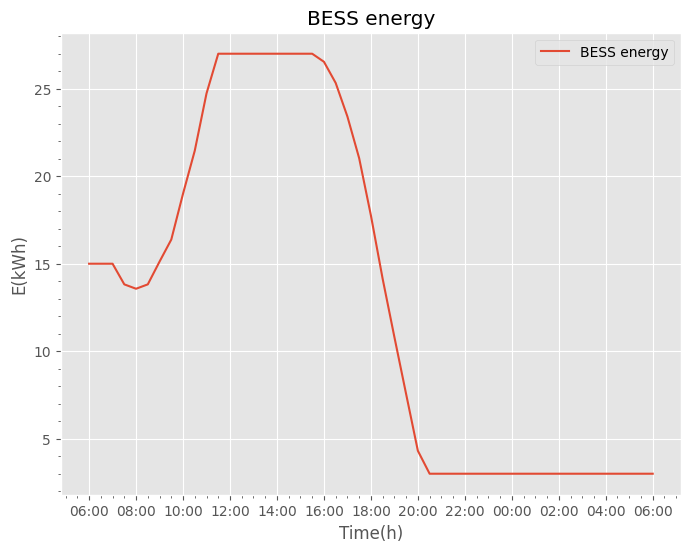

In [11]:
bes_energy = bess_df.loc[:, 'E(kWh)'][:len(time)]

#Plot the data
fig = plt.figure(figsize=(8,6))
plt.title('BESS energy')
plt.plot(time, bes_energy, label='BESS energy')
plt.legend()
plt.xlabel('Time(h)')
plt.ylabel('E(kWh)')
plt.grid(True)

# Format the x axis to display readable times
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

# save_fig(fig,'bess_energy_simple',output_img)

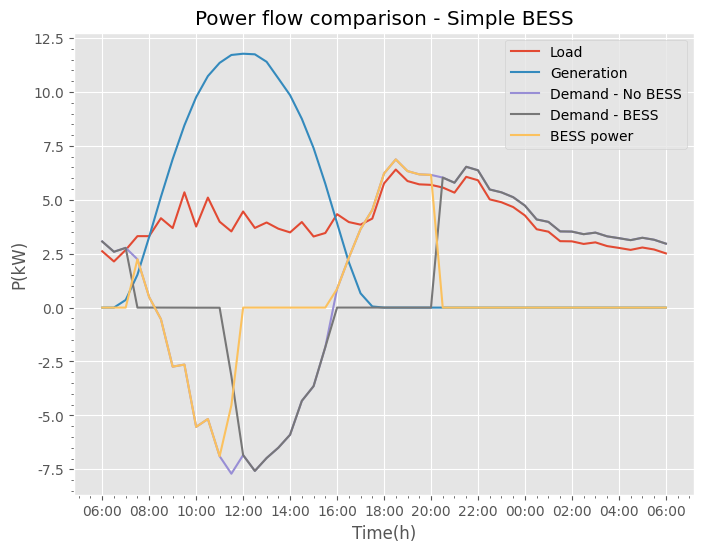

In [14]:
power_no_bess = pd.read_csv(output_csv + 'demand/' f'demand_NoOperation_year{dss}.csv')
demand_no_bess = power_no_bess['P(kW)'].values[:len(time)]

#Plot the data
fig = plt.figure(figsize=(8,6))
plt.title('Power flow comparison - Simple BESS')
plt.plot(time, load, label='Load')
plt.plot(time, generation, label='Generation')
plt.plot(time, demand_no_bess, label='Demand - No BESS')
plt.plot(time, demand_bess, label='Demand - BESS')
plt.plot(time, bess_power, label='BESS power')
plt.legend()
plt.xlabel('Time(h)')
plt.ylabel('P(kW)')
plt.grid(True)

# # Format the x axis to display readable times
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

# save_fig(fig,'power_compar_smoothing',output_img)



In [8]:
import matplotlib.pyplot as plt

# Dados do perfil de carga
new_hours = [i / 2 for i in range(48)]  # Gera os horários de 0 a 24 com intervalos de 30 minutos
print(new_hours)
# Pega os valores a cada 30 minutos do perfil de carga em um intervalo de 0 a 24 horas
new_mult = [mult[int(i * 2)] for i in range(48)]
print(new_mult)
    

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(new_hours, new_mult, label="Perfil de Carga", color='blue', linestyle='-', marker='o')

plt.title("Perfil de Carga - 24h com Intervalo de 30 minutos")
plt.xlabel("Horas")
plt.ylabel("Multiplicador")
plt.grid(True)
plt.xticks(range(25))  # Mostra as horas inteiras no eixo X
plt.legend()
plt.tight_layout()
plt.show()


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5]


NameError: name 'mult' is not defined

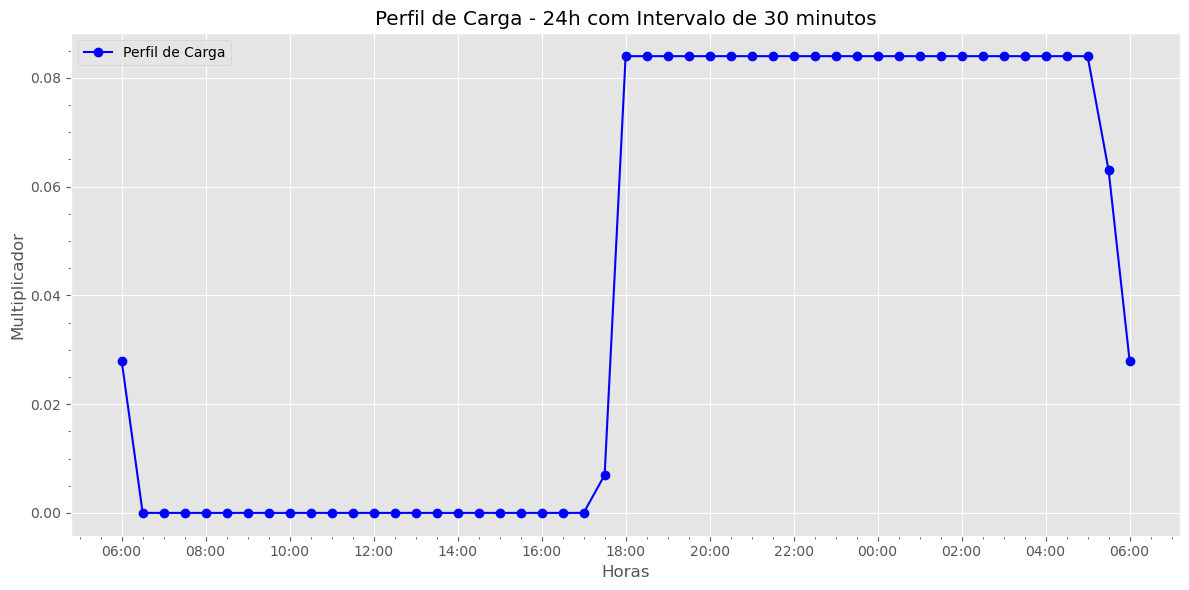

In [40]:
file = path_load + 'public_ilumination.csv'

df = pd.read_csv(file)
power_ilum = df['Ppower'][:len(time)]

# Criando o gráfico
# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(time, power_ilum, label="Perfil de Carga", color='blue', linestyle='-', marker='o')

# Format the x axis to display readable times
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

plt.title("Perfil de Carga - 24h com Intervalo de 30 minutos")
plt.xlabel("Horas")
plt.ylabel("Multiplicador")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
